### Dataset [URL](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt)

In [1]:
import tensorflow as tf
tf.enable_eager_execution()
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras import regularizers
import tensorflow.keras.utils as kutils 
import numpy as np 
import matplotlib.pyplot as plt

### Importing the dataset

In [2]:
dataset = open('mlai.txt').read()

In [3]:
corpus_data = dataset.lower().split("\n")

In [4]:
tokenizer = Tokenizer()

In [5]:
tokenizer.fit_on_texts(corpus_data)
word_index=tokenizer.word_index
total_words = len(word_index) + 1

In [6]:
total_words

115

### create input sequences using list of tokens
### here jut we are taking last word as lable before that it will be input like fibonaci series

### here we need to use pre-padding of sequence 

In [7]:
sequences_input = []
for eachline in corpus_data:
    token_list = tokenizer.texts_to_sequences([eachline])[0]
    for i in range(1, len(token_list)):
        sequence_n_gram = token_list[:i+1]
        sequences_input.append(sequence_n_gram)


In [8]:
print(sequences_input[0])
print(sequences_input[1])
print(sequences_input[2])
print(sequences_input[3])
print(sequences_input[4])
print(sequences_input[5])

[5, 1]
[5, 1, 8]
[5, 1, 8, 16]
[5, 1, 8, 16, 45]
[5, 1, 8, 16, 45, 3]
[5, 1, 8, 16, 45, 3, 17]


In [9]:
max_len_sequence = max([len(x) for x in sequences_input])
sequences_input = np.array(pad_sequences(sequences_input, maxlen=max_len_sequence, padding='pre'))

In [10]:
print(sequences_input[0])
print(sequences_input[1])
print(sequences_input[2])
print(sequences_input[3])
print(sequences_input[4])
print(sequences_input[5])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 1 8]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  5  1  8 16]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  5  1  8 16 45]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  5  1  8 16 45  3]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  5  1  8 16 45  3 17]


In [11]:
x_train, y_train = sequences_input[:,:-1],sequences_input[:,-1]
y_train = kutils.to_categorical(y_train, num_classes=total_words)

In [12]:
print(y_train[0])
print(y_train[1])
print(y_train[2])
print(y_train[3])
print(y_train[4])
print(y_train[5])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.

### Hyper Parameter

In [13]:
vocab_size=total_words
embed_dim=100
max_len=max_len_sequence-1
trunc_type='post'
oov_tok="<OOV>"
num_epochs = 500
batch_size=32
l2=0.01
keep_prob=0.2

### Building a model

In [14]:
"""
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_len_sequence-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(vocab_size/2, activation='relu', kernel_regularizer=regularizers.l2(l2)))
model.add(Dense(vocab_size, activation='softmax'))
"""

"\nmodel = Sequential()\nmodel.add(Embedding(vocab_size, 100, input_length=max_len_sequence-1))\nmodel.add(Bidirectional(LSTM(150, return_sequences = True)))\nmodel.add(Dropout(0.2))\nmodel.add(LSTM(100))\nmodel.add(Dense(vocab_size/2, activation='relu', kernel_regularizer=regularizers.l2(l2)))\nmodel.add(Dense(vocab_size, activation='softmax'))\n"

In [15]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embed_dim,input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150, return_sequences=True)),
    tf.keras.layers.Dropout(keep_prob),
    tf.keras.layers.LSTM(100),
    tf.keras.layers.Dense(vocab_size/2, activation='relu', kernel_regularizer=regularizers.l2(l2)),
    tf.keras.layers.Dense(vocab_size, activation='softmax')    
])

In [17]:
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, decay=0.001)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 35, 100)           11500     
_________________________________________________________________
bidirectional (Bidirectional (None, 35, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 35, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 57)                5757      
_________________________________________________________________
dense_1 (Dense)              (None, 115)               6670      
Total params: 485,527
Trainable params: 485,527
Non-trainable params: 0
__________________________________________________

In [ ]:
#earlyStopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.01) 
#modelCheckpoint = ModelCheckpoint('Text_Generation_Using_N-gram.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [18]:
history=model.fit(x_train, y_train,batch_size = batch_size, epochs=num_epochs,verbose=1)

Train on 215 samples
Epoch 1/500
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
215/215 [==============================] - 20s 94ms/sample - loss: 5.4369 - acc: 0.0512
Epoch 2/500
215/215 [==============================] - 4s 19ms/sample - loss: 5.2999 - acc: 0.0558
Epoch 3/500
215/215 [==============================] - 4s 20ms/sample - loss: 5.1584 - acc: 0.0558
Epoch 4/500
215/215 [==============================] - 4s 20ms/sample - loss: 5.0674 - acc: 0.0558
Epoch 5/500
215/215 [==============================] - 9s 43ms/sample - loss: 4.9766 - acc: 0.0558
Epoch 6/500
215/215 [==============================] - 9s 42ms/sample - loss: 4.8862 - acc: 0.0651
Epoch 7/500
215/215 [==============================] - 4s 19ms/sample - loss: 4.8013 - acc: 0.0605
Epoch 8/500
215/215 [==============================] - 4s 19ms/sample - loss: 4.7175 - acc: 0.0744
Epoch 9/500
215/215 [==============================] - 4s 20ms/sample - loss: 4.6193 - acc: 

215/215 [==============================] - 5s 21ms/sample - loss: 1.8984 - acc: 0.5860
Epoch 80/500
215/215 [==============================] - 5s 21ms/sample - loss: 1.8242 - acc: 0.5907
Epoch 81/500
215/215 [==============================] - 5s 22ms/sample - loss: 1.7613 - acc: 0.5953
Epoch 82/500
215/215 [==============================] - 4s 20ms/sample - loss: 1.6364 - acc: 0.6605
Epoch 83/500
215/215 [==============================] - 4s 20ms/sample - loss: 1.6014 - acc: 0.6605
Epoch 84/500
215/215 [==============================] - 5s 21ms/sample - loss: 1.5609 - acc: 0.6558
Epoch 85/500
215/215 [==============================] - 5s 21ms/sample - loss: 1.5085 - acc: 0.6698
Epoch 86/500
215/215 [==============================] - 4s 21ms/sample - loss: 1.4582 - acc: 0.7442
Epoch 87/500
215/215 [==============================] - 4s 20ms/sample - loss: 1.4391 - acc: 0.7581
Epoch 88/500
215/215 [==============================] - 5s 23ms/sample - loss: 1.3941 - acc: 0.7721
Epoch 89/500


215/215 [==============================] - 5s 23ms/sample - loss: 0.8005 - acc: 0.9163
Epoch 161/500
215/215 [==============================] - 5s 25ms/sample - loss: 0.7563 - acc: 0.9535
Epoch 162/500
215/215 [==============================] - 5s 25ms/sample - loss: 0.7267 - acc: 0.9488
Epoch 163/500
215/215 [==============================] - 5s 24ms/sample - loss: 0.6988 - acc: 0.9581
Epoch 164/500
215/215 [==============================] - 5s 23ms/sample - loss: 0.6934 - acc: 0.9395
Epoch 165/500
215/215 [==============================] - 5s 25ms/sample - loss: 0.6819 - acc: 0.9581
Epoch 166/500
215/215 [==============================] - 5s 24ms/sample - loss: 0.6707 - acc: 0.9535
Epoch 167/500
215/215 [==============================] - 5s 23ms/sample - loss: 0.6602 - acc: 0.9674
Epoch 168/500
215/215 [==============================] - 5s 25ms/sample - loss: 0.6469 - acc: 0.9721
Epoch 169/500
215/215 [==============================] - 5s 24ms/sample - loss: 0.6341 - acc: 0.9628
Epoc

215/215 [==============================] - 6s 29ms/sample - loss: 0.4040 - acc: 0.9674
Epoch 242/500
215/215 [==============================] - 6s 27ms/sample - loss: 0.3894 - acc: 0.9814
Epoch 243/500
215/215 [==============================] - 8s 37ms/sample - loss: 0.3935 - acc: 0.9721
Epoch 244/500
215/215 [==============================] - 8s 36ms/sample - loss: 0.4225 - acc: 0.9628
Epoch 245/500
215/215 [==============================] - 6s 29ms/sample - loss: 0.4063 - acc: 0.9767
Epoch 246/500
215/215 [==============================] - 7s 31ms/sample - loss: 0.4145 - acc: 0.9721
Epoch 247/500
215/215 [==============================] - 6s 30ms/sample - loss: 0.4105 - acc: 0.9814
Epoch 248/500
215/215 [==============================] - 7s 31ms/sample - loss: 0.4101 - acc: 0.9721
Epoch 249/500
215/215 [==============================] - 6s 28ms/sample - loss: 0.4571 - acc: 0.9581
Epoch 250/500
215/215 [==============================] - 6s 29ms/sample - loss: 0.5219 - acc: 0.9349
Epoc

215/215 [==============================] - 8s 35ms/sample - loss: 0.2719 - acc: 0.9907
Epoch 323/500
215/215 [==============================] - 7s 34ms/sample - loss: 0.2699 - acc: 0.9907
Epoch 324/500
215/215 [==============================] - 8s 36ms/sample - loss: 0.2680 - acc: 0.9907
Epoch 325/500
215/215 [==============================] - 7s 34ms/sample - loss: 0.2679 - acc: 0.9907
Epoch 326/500
215/215 [==============================] - 8s 35ms/sample - loss: 0.2670 - acc: 0.9907
Epoch 327/500
215/215 [==============================] - 7s 33ms/sample - loss: 0.2666 - acc: 0.9860
Epoch 328/500
215/215 [==============================] - 8s 37ms/sample - loss: 0.2652 - acc: 0.9814
Epoch 329/500
215/215 [==============================] - 7s 34ms/sample - loss: 0.2637 - acc: 0.9860
Epoch 330/500
215/215 [==============================] - 9s 42ms/sample - loss: 0.2616 - acc: 0.9907
Epoch 331/500
215/215 [==============================] - 8s 38ms/sample - loss: 0.2615 - acc: 0.9860
Epoc

215/215 [==============================] - 9s 41ms/sample - loss: 0.2131 - acc: 0.9860
Epoch 404/500
215/215 [==============================] - 12s 54ms/sample - loss: 0.2179 - acc: 0.9767
Epoch 405/500
215/215 [==============================] - 9s 40ms/sample - loss: 0.2159 - acc: 0.9814
Epoch 406/500
215/215 [==============================] - 9s 41ms/sample - loss: 0.2123 - acc: 0.9814
Epoch 407/500
215/215 [==============================] - 9s 40ms/sample - loss: 0.2257 - acc: 0.9814
Epoch 408/500
215/215 [==============================] - 9s 42ms/sample - loss: 0.2832 - acc: 0.9674
Epoch 409/500
215/215 [==============================] - 9s 40ms/sample - loss: 0.3209 - acc: 0.9674
Epoch 410/500
215/215 [==============================] - 9s 41ms/sample - loss: 0.3310 - acc: 0.9767
Epoch 411/500
215/215 [==============================] - 9s 42ms/sample - loss: 0.3513 - acc: 0.9488
Epoch 412/500
215/215 [==============================] - 9s 40ms/sample - loss: 0.2960 - acc: 0.9814
Epo

Epoch 484/500
215/215 [==============================] - 10s 45ms/sample - loss: 0.2365 - acc: 0.9814
Epoch 485/500
215/215 [==============================] - 10s 44ms/sample - loss: 0.2668 - acc: 0.9628
Epoch 486/500
215/215 [==============================] - 10s 46ms/sample - loss: 0.3887 - acc: 0.9349
Epoch 487/500
215/215 [==============================] - 10s 46ms/sample - loss: 0.5774 - acc: 0.8791
Epoch 488/500
215/215 [==============================] - 10s 45ms/sample - loss: 0.6049 - acc: 0.8744
Epoch 489/500
215/215 [==============================] - 10s 47ms/sample - loss: 0.6142 - acc: 0.8698
Epoch 490/500
215/215 [==============================] - 10s 45ms/sample - loss: 0.6003 - acc: 0.8837
Epoch 491/500
215/215 [==============================] - 10s 47ms/sample - loss: 0.5568 - acc: 0.8651
Epoch 492/500
215/215 [==============================] - 10s 47ms/sample - loss: 0.5391 - acc: 0.9070
Epoch 493/500
215/215 [==============================] - 10s 47ms/sample - loss: 0

#### check the model behaviour using graph

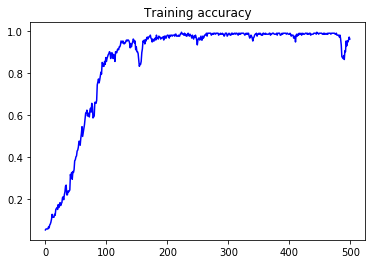

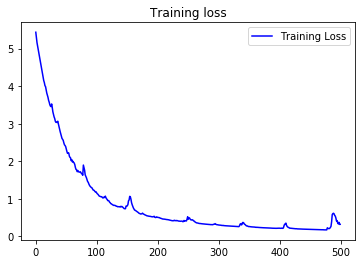

In [19]:
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

### from the above graph you can observed that 200 epoch is fine for our data 

In [20]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(115, 100)


### here we are just revesing the order of word and number (word:number to number:word) input data [url](http://mlaileader.com/post/machine-learning)

In [29]:
seed_text = "Categories of Machine learning"
next_words = 50
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_len, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Categories of Machine learning machine learning are mainly classified into three categories of of without being explicitly programmed using algorithm algorithm explicitly programmed using algorithm algorithm variable and dependent variable dv target variable outcome target variable outcome target variable outcome target variable outcome target variable outcome target variable outcome target variable outcome target variable


### From the above generated sequence you can see lot of repeted word , actually that is beacause of less data , 
### if you will take more data and better computer text then you can genrate shakespeare type text